# GRIP Task-2

### Objective of the task
In this task we will cluster the iris flower species and graphically represent it. 

### Import the relevant libraries

In [1]:
# first of all we will import the relevant libraries
import pandas as pd # For data manipulation
import numpy as np # For data computation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns
sns.set()
from sklearn import datasets # for loading the dataset
from sklearn.cluster import KMeans # for clustering the species

In [2]:
# Loading the dataset in iris variable
iris = datasets.load_iris()
# Creating iris dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
# Visualizing first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Creating array 
x = iris_df.iloc[:,0:5].values

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## What is KMeans Clustering?

K-means clustering is a method used for clustering analysis.It can be considered a method of finding out which group a certain object really belongs to.

K- means clustering is performed for different values of k (from 1 to 10). WCSS is calculated for each cluster. A curve is plotted between WCSS values and the number of clusters k. The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.

In [5]:
# Within cluster sum of square
wcss = []
cl_num = 10
for i in range(1, cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


In [6]:
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.30610712530712,
 34.40900974025975,
 30.064593073593088,
 27.787574873448456]

Text(0, 0.5, 'Within-cluster Sum of Squares')

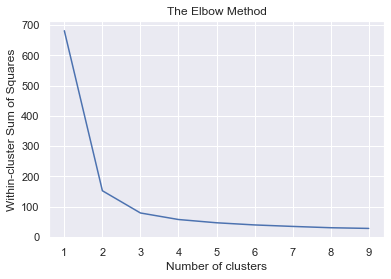

In [7]:
# Visualizing Elbow method
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In above graph we clearly see that k = 3 would be the right value. 

In [8]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [9]:
identified_clusters = kmeans.fit_predict(x)

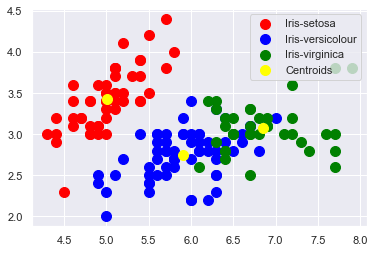

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(x[identified_clusters == 0, 0], x[identified_clusters == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[identified_clusters == 1, 0], x[identified_clusters == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[identified_clusters == 2, 0], x[identified_clusters == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
